# Building Convolutional Neural Network using NumPy from Scratch

In [1]:
pip install scikit-image


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: C:\Users\Roja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


##### Importing libraries



In [2]:
import matplotlib.pyplot as plt
import skimage
from skimage import data, color
import numpy as np
import sys

##### The version of data imagery

In [3]:
print(skimage.__version__)

0.24.0


## 1. Reading input image

In [55]:
# Reading the image  
img = data.chelsea()  

# Converting the image into gray  
img_gray = color.rgb2gray(img)

##### Display one sample of data imagery

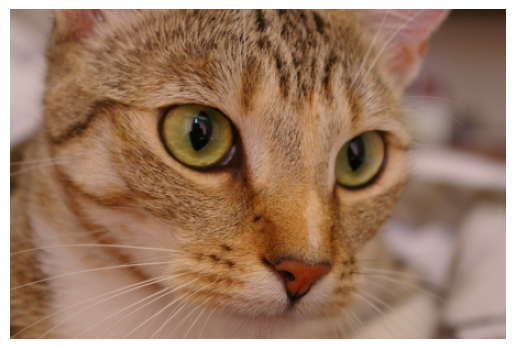

In [5]:
# Display the image
plt.imshow(img)
plt.axis('off')  # To hide axis labels
plt.show()


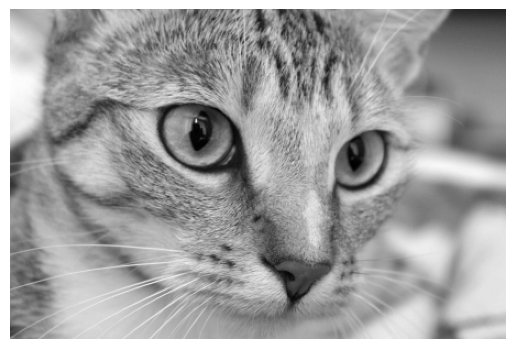

In [6]:
# Display the grayscale image
plt.imshow(img_gray, cmap='gray')  # 'cmap' sets the color map to gray
plt.axis('off')  # To hide axis labels
plt.show()


##### all available datasets

In [7]:
# List all available datasets in skimage.data
available_datasets = dir(skimage.data)

# Filter for images (typically those without underscores at the start)
image_datasets = [item for item in available_datasets if not item.startswith('_')]

# Count the number of datasets (built-in images)
num_images = len(image_datasets)

# Print the result
print(f"Number of available built-in datasets/images: {num_images}")
print("List of available datasets:", image_datasets)

Number of available built-in datasets/images: 42
List of available datasets: ['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


## 2. Preparing filters

In [56]:
# Initialize a filter bank of size (2, 3, 3)
l1_filter = np.zeros((2, 3, 3))    # 2 filters in dimention 3 * 3

# Assign the first filter (horizontal edge detector)
l1_filter[0, :, :] = np.array([[-1, 0, 1],
                               [-1, 0, 1],
                               [-1, 0, 1]])

# Assign the second filter (vertical edge detector)
l1_filter[1, :, :] = np.array([[1, 1, 1],
                               [0, 0, 0],
                               [-1, -1, -1]])

# Print the filters to see their values
print("Filter 1 (Horizontal Edge Detector):\n", l1_filter[0])
print("Filter 2 (Vertical Edge Detector):\n", l1_filter[1])

Filter 1 (Horizontal Edge Detector):
 [[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
Filter 2 (Vertical Edge Detector):
 [[ 1.  1.  1.]
 [ 0.  0.  0.]
 [-1. -1. -1.]]


## 3. Conv Layer to build feature maps 

In [57]:
# The convolution function for applying a filter bank
def conv(img, conv_filter):
    if len(img.shape) > 2 or len(conv_filter.shape) > 3:  # Check if number of image channels matches the filter depth.  
        if img.shape[-1] != conv_filter.shape[-1]:  
            print("Error: Number of channels in both image and filter must match.")  
            sys.exit()  
    if conv_filter.shape[1] != conv_filter.shape[2]:  # Check if filter dimensions are equal.  
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')  
        sys.exit()  
    if conv_filter.shape[1] % 2 == 0:  # Check if filter dimensions are odd.  
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')  
        sys.exit()  
    
    # An empty feature map to hold the output of convolving the filter(s) with the image.  
    feature_maps = np.zeros((img.shape[0] - conv_filter.shape[1] + 1,   
                             img.shape[1] - conv_filter.shape[1] + 1,   
                             conv_filter.shape[0]))  
    
    # Convolving the image by the filter(s).  
    for filter_num in range(conv_filter.shape[0]):  
        print("Filter ", filter_num + 1)  
        curr_filter = conv_filter[filter_num, :]  # getting a filter from the bank.  
        if len(curr_filter.shape) > 2:  
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0])  # Array holding the sum of all feature maps.  
            for ch_num in range(1, curr_filter.shape[-1]):  # Convolving each channel with the image and summing the results.  
                conv_map = conv_map + conv_(img[:, :, ch_num],   
                                            curr_filter[:, :, ch_num])  
        else:  # There is just a single channel in the filter.  
            conv_map = conv_(img, curr_filter)  
        feature_maps[:, :, filter_num] = conv_map  # Holding feature map with the current filter.
        
    return feature_maps  # Returning all feature maps.


##### Plotting

Filter  1
Filter  2


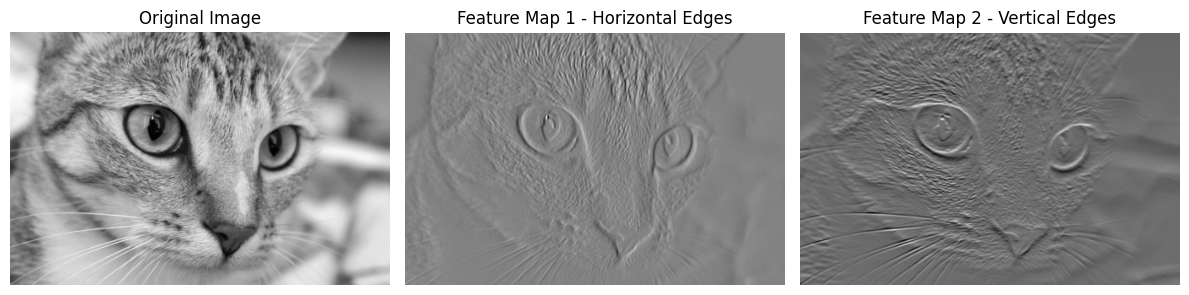

In [58]:
# Apply the convolution function
feature_maps = conv(img_gray, l1_filter)

# Plot the original image and feature maps
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Feature map 1 (Horizontal edges)
plt.subplot(1, 3, 2)
plt.imshow(feature_maps[:, :, 0], cmap='gray')
plt.title('Feature Map 1 - Horizontal Edges')
plt.axis('off')

# Feature map 2 (Vertical edges)
plt.subplot(1, 3, 3)
plt.imshow(feature_maps[:, :, 1], cmap='gray')
plt.title('Feature Map 2 - Vertical Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

In [43]:
def conv_(img, conv_filter):  
    filter_size = conv_filter.shape[0]  
    result = numpy.zeros((img.shape))  
    
    # Looping through the image to apply the convolution operation.  
    for r in numpy.uint16(numpy.arange(filter_size / 2, img.shape[0] - filter_size / 2 - 2)):  
        for c in numpy.uint16(numpy.arange(filter_size / 2, img.shape[1] - filter_size / 2 - 2)):  
            # Getting the current region to get multiplied with the filter.  
            curr_region = img[r:r + filter_size, c:c + filter_size]  
            # Element-wise multiplication between the current region and the filter.  
            curr_result = curr_region * conv_filter  
            conv_sum = numpy.sum(curr_result)  # Summing the result of multiplication.  
            result[r, c] = conv_sum  # Saving the summation in the convolution layer feature map.  
    
    # Clipping the outliers of the result matrix.  
    final_result = result[numpy.uint16(filter_size / 2):result.shape[0] - numpy.uint16(filter_size / 2),   
                          numpy.uint16(filter_size / 2):result.shape[1] - numpy.uint16(filter_size / 2)]  
    return final_result


##### Plotting

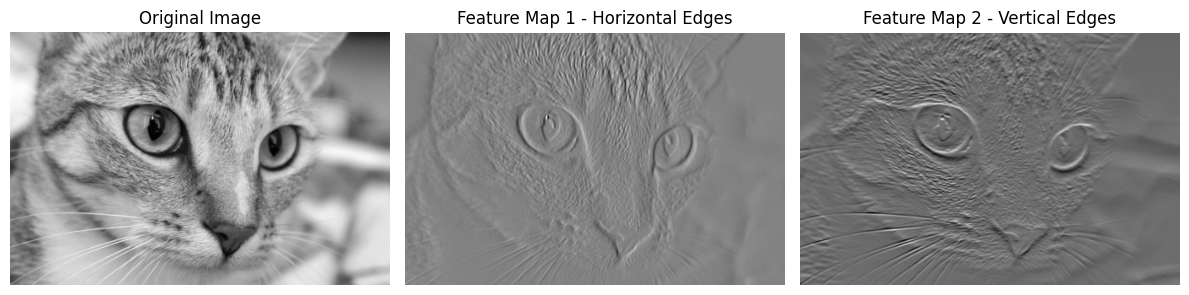

In [62]:
# Apply the conv_ function directly for each filter
feature_map_1 = conv_(img_gray, l1_filter[0])  # Horizontal edges
feature_map_2 = conv_(img_gray, l1_filter[1])  # Vertical edges

# Plot the original image and feature maps
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Feature map 1 (Horizontal edges)
plt.subplot(1, 3, 2)
plt.imshow(feature_map_1, cmap='gray')
plt.title('Feature Map 1 - Horizontal Edges')
plt.axis('off')

# Feature map 2 (Vertical edges)
plt.subplot(1, 3, 3)
plt.imshow(feature_map_2, cmap='gray')
plt.title('Feature Map 2 - Vertical Edges')
plt.axis('off')

plt.tight_layout()
plt.show()

## 4. ReLU Activation Function on Feature Maps

In [68]:
# Define the ReLU function
def relu(feature_map):
    relu_out = np.zeros(feature_map.shape)  
    for map_num in range(feature_map.shape[-1]):  
        for r in range(feature_map.shape[0]):  
            for c in range(feature_map.shape[1]):  
                relu_out[r, c, map_num] = max(feature_map[r, c, map_num], 0)  
    return relu_out

##### Plotting

Filter  1
Filter  2


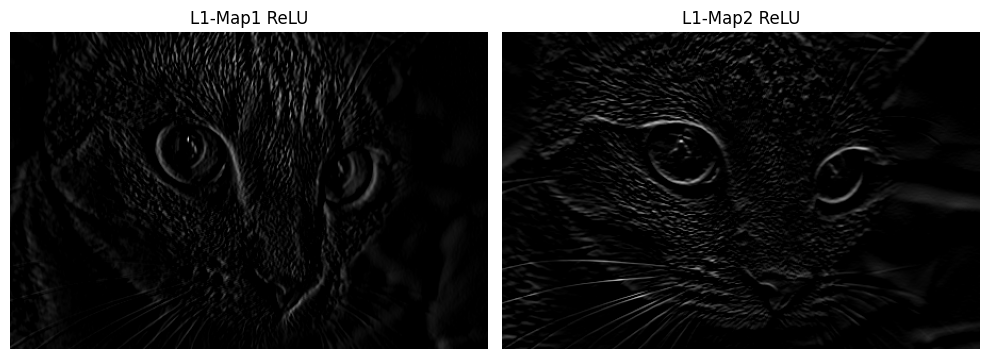

In [70]:
# Apply the convolution function
l1_feature_map = conv(img_gray, l1_filter)

# Apply ReLU function
l1_feature_map_relu = relu(l1_feature_map)

# Normalize feature maps for better visualization
l1_feature_map_relu_normalized = (l1_feature_map_relu - np.min(l1_feature_map_relu)) / (np.max(l1_feature_map_relu) - np.min(l1_feature_map_relu))

# Plot the ReLU feature maps
plt.figure(figsize=(10, 5))

# Feature map 1 after ReLU
plt.subplot(1, 2, 1)
plt.imshow(l1_feature_map_relu_normalized[:, :, 0], cmap='gray')
plt.title('L1-Map1 ReLU')
plt.axis('off')

# Feature map 2 after ReLU
plt.subplot(1, 2, 2)
plt.imshow(l1_feature_map_relu_normalized[:, :, 1], cmap='gray')
plt.title('L1-Map2 ReLU')
plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Max Pooling Layer

In [73]:
def pooling(feature_map, size=2, stride=2):  
    # Preparing the output of the pooling operation.  
    pool_out = np.zeros((np.uint16((feature_map.shape[0] - size + 1) / stride),  
                         np.uint16((feature_map.shape[1] - size + 1) / stride),  
                         feature_map.shape[-1]))  
    
    for map_num in range(feature_map.shape[-1]):  
        r2 = 0  
        for r in np.arange(0, feature_map.shape[0] - size - 1, stride):  
            c2 = 0  
            for c in np.arange(0, feature_map.shape[1] - size - 1, stride):  
                pool_out[r2, c2, map_num] = np.max(feature_map[r:r+size, c:c+size])  
                c2 = c2 + 1  
            r2 = r2 + 1  
    return pool_out
    
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)  

##### Plotting

Filter  1
Filter  2


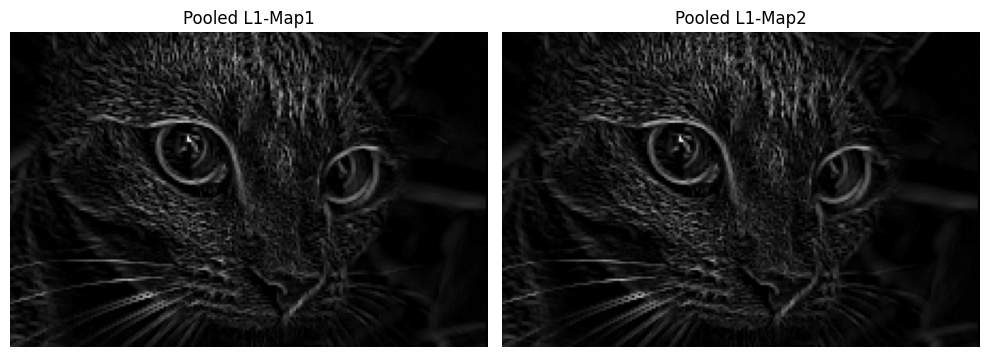

In [74]:
# Apply the convolution function
l1_feature_map = conv(img_gray, l1_filter)

# Apply ReLU function
l1_feature_map_relu = relu(l1_feature_map)

# Apply pooling function
pooled_feature_map = pooling(l1_feature_map_relu)

# Normalize feature maps for better visualization
pooled_feature_map_normalized = (pooled_feature_map - np.min(pooled_feature_map)) / (np.max(pooled_feature_map) - np.min(pooled_feature_map))

# Plot the pooled feature maps
plt.figure(figsize=(10, 5))

# Pooled feature map 1
plt.subplot(1, 2, 1)
plt.imshow(pooled_feature_map_normalized[:, :, 0], cmap='gray')
plt.title('Pooled L1-Map1')
plt.axis('off')

# Pooled feature map 2
plt.subplot(1, 2, 2)
plt.imshow(pooled_feature_map_normalized[:, :, 1], cmap='gray')
plt.title('Pooled L1-Map2')
plt.axis('off')

plt.tight_layout()
plt.show()


## 6. Stacking Layers

In [75]:
# Second conv layer  
l2_filter = numpy.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])  
print("\n**Working with conv layer 2**")  
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)  
print("\n**ReLU**")  
l2_feature_map_relu = relu(l2_feature_map)  
print("\n**Pooling**")  
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)  
print("**End of conv layer 2**\n")



**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**
**End of conv layer 2**



##### Plotting

Filter  1
Filter  2
Filter  3


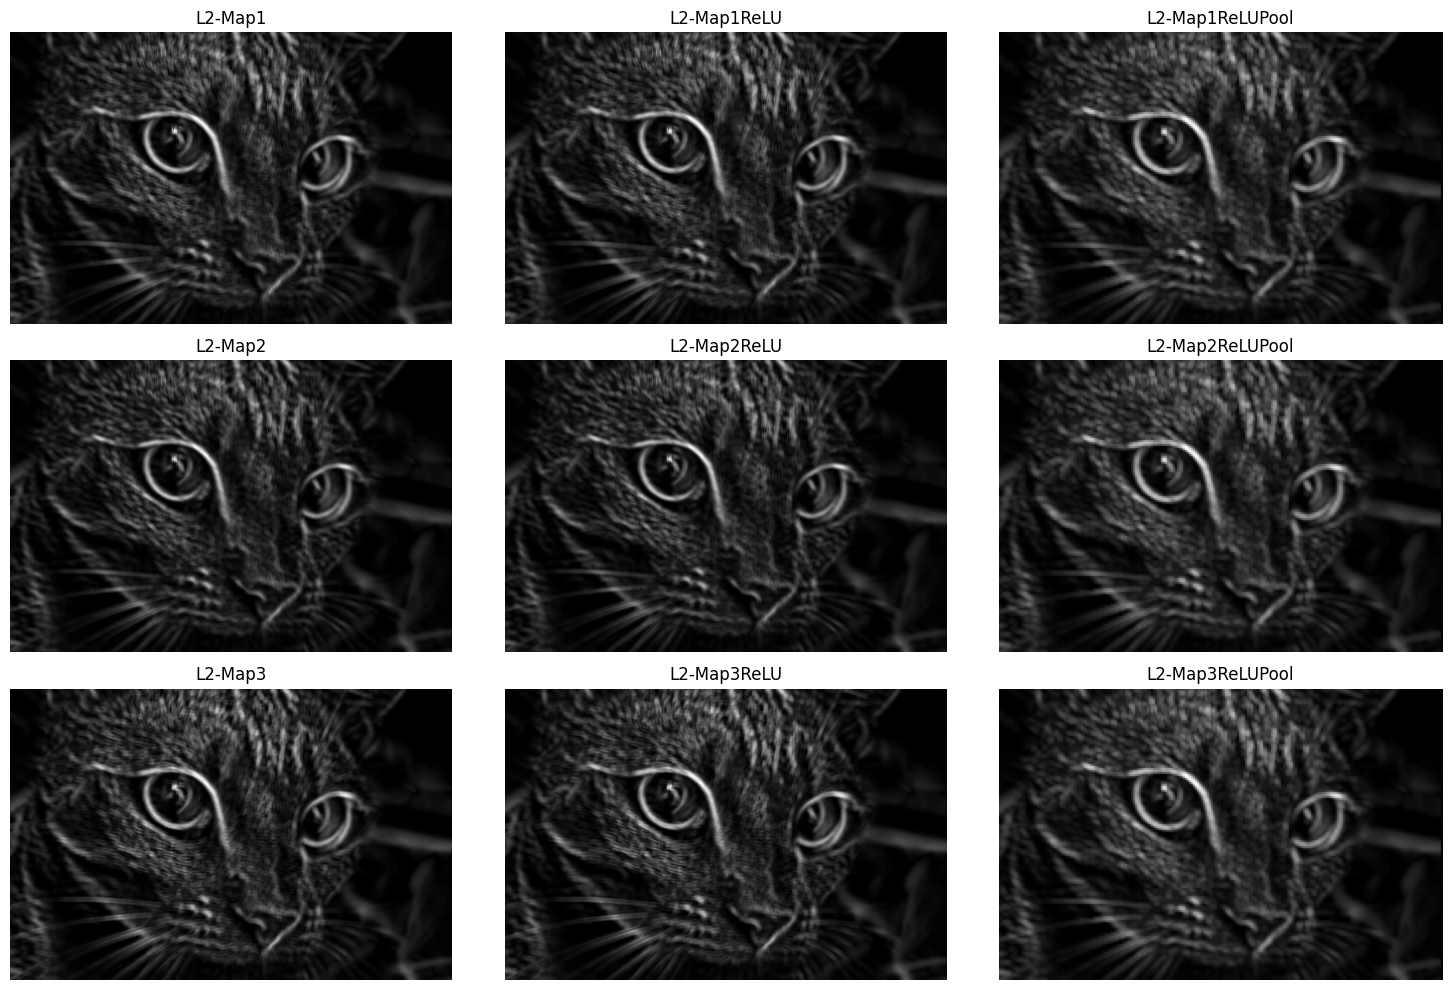

In [80]:
# Apply the second convolution function using 3 filters
l2_filter = np.random.rand(3, 5, 5, l1_feature_map_relu.shape[-1])

# Apply the second convolution
l2_feature_map = conv(l1_feature_map_relu, l2_filter)

# Apply ReLU function on second conv layer
l2_feature_map_relu = relu(l2_feature_map)

# Apply pooling function on ReLU-ed second conv layer
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)

# Normalize feature maps for better visualization
l2_feature_map_normalized = (l2_feature_map - np.min(l2_feature_map)) / (np.max(l2_feature_map) - np.min(l2_feature_map))
l2_feature_map_relu_normalized = (l2_feature_map_relu - np.min(l2_feature_map_relu)) / (np.max(l2_feature_map_relu) - np.min(l2_feature_map_relu))
l2_feature_map_relu_pool_normalized = (l2_feature_map_relu_pool - np.min(l2_feature_map_relu_pool)) / (np.max(l2_feature_map_relu_pool) - np.min(l2_feature_map_relu_pool))

# Plot the feature maps from the 3 filters
plt.figure(figsize=(15, 10))

# Feature map 1 from second conv layer
plt.subplot(3, 3, 1)
plt.imshow(l2_feature_map_normalized[:, :, 0], cmap='gray')
plt.title('L2-Map1')
plt.axis('off')

# Feature map 1 after ReLU in second conv layer
plt.subplot(3, 3, 2)
plt.imshow(l2_feature_map_relu_normalized[:, :, 0], cmap='gray')
plt.title('L2-Map1ReLU')
plt.axis('off')

# Feature map 1 after pooling in second conv layer
plt.subplot(3, 3, 3)
plt.imshow(l2_feature_map_relu_pool_normalized[:, :, 0], cmap='gray')
plt.title('L2-Map1ReLUPool')
plt.axis('off')

# Feature map 2 from second conv layer
plt.subplot(3, 3, 4)
plt.imshow(l2_feature_map_normalized[:, :, 1], cmap='gray')
plt.title('L2-Map2')
plt.axis('off')

# Feature map 2 after ReLU in second conv layer
plt.subplot(3, 3, 5)
plt.imshow(l2_feature_map_relu_normalized[:, :, 1], cmap='gray')
plt.title('L2-Map2ReLU')
plt.axis('off')

# Feature map 2 after pooling in second conv layer
plt.subplot(3, 3, 6)
plt.imshow(l2_feature_map_relu_pool_normalized[:, :, 1], cmap='gray')
plt.title('L2-Map2ReLUPool')
plt.axis('off')

# Feature map 3 from second conv layer
plt.subplot(3, 3, 7)
plt.imshow(l2_feature_map_normalized[:, :, 2], cmap='gray')
plt.title('L2-Map3')
plt.axis('off')

# Feature map 3 after ReLU in second conv layer
plt.subplot(3, 3, 8)
plt.imshow(l2_feature_map_relu_normalized[:, :, 2], cmap='gray')
plt.title('L2-Map3ReLU')
plt.axis('off')

# Feature map 3 after pooling in second conv layer
plt.subplot(3, 3, 9)
plt.imshow(l2_feature_map_relu_pool_normalized[:, :, 2], cmap='gray')
plt.title('L2-Map3ReLUPool')
plt.axis('off')

plt.tight_layout()
plt.show()


##### Implementing the code for a single filter

In [ ]:
# Third conv layer  
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])  
print("\n**Working with conv layer 3**")  
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)  
print("\n**ReLU**")  
l3_feature_map_relu = relu(l3_feature_map)  
print("\n**Pooling**")  
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)  
print("**End of conv layer 3**\n")


##### Plotting


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**
**End of conv layer 3**



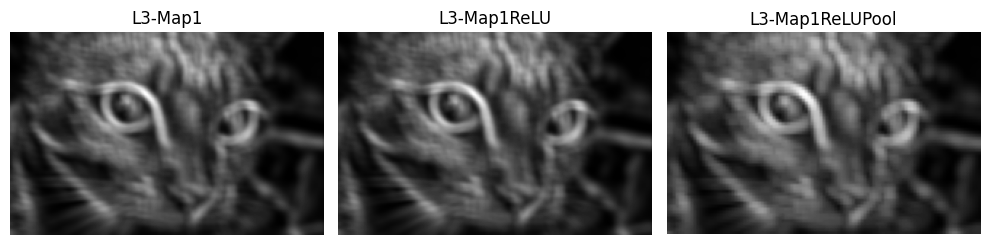

In [83]:
# Third conv layer with a single filter
l3_filter = np.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])
print("\n**Working with conv layer 3**")

# Apply the third convolution function
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)

print("\n**ReLU**")
# Apply ReLU function on third conv layer
l3_feature_map_relu = relu(l3_feature_map)

print("\n**Pooling**")
# Apply pooling function on ReLU-ed third conv layer
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)

print("**End of conv layer 3**\n")

# Normalize feature maps for better visualization
l3_feature_map_normalized = (l3_feature_map - np.min(l3_feature_map)) / (np.max(l3_feature_map) - np.min(l3_feature_map))
l3_feature_map_relu_normalized = (l3_feature_map_relu - np.min(l3_feature_map_relu)) / (np.max(l3_feature_map_relu) - np.min(l3_feature_map_relu))
l3_feature_map_relu_pool_normalized = (l3_feature_map_relu_pool - np.min(l3_feature_map_relu_pool)) / (np.max(l3_feature_map_relu_pool) - np.min(l3_feature_map_relu_pool))

# Plot the feature maps from the third conv layer
plt.figure(figsize=(10, 3))

# Feature map 1 from third conv layer
plt.subplot(1, 3, 1)
plt.imshow(l3_feature_map_normalized[:, :, 0], cmap='gray')
plt.title('L3-Map1')
plt.axis('off')

# Feature map 1 after ReLU in third conv layer
plt.subplot(1, 3, 2)
plt.imshow(l3_feature_map_relu_normalized[:, :, 0], cmap='gray')
plt.title('L3-Map1ReLU')
plt.axis('off')

# Feature map 1 after pooling in third conv layer
plt.subplot(1, 3, 3)
plt.imshow(l3_feature_map_relu_pool_normalized[:, :, 0], cmap='gray')
plt.title('L3-Map1ReLUPool')
plt.axis('off')

plt.tight_layout()
plt.show()
